# Part 1: Time Series Exploring and Understanding
By Josh Houlding

Each machine learning algorithm expects data as input that needs to be formatted in a very specific way, so time series datasets generally require some cleaning and feature engineering processes before they can generate useful insights. Since time series data has a temporal feature, only some of the statistical methodologies are appropriate for time series data.

For this activity, in 500-750 words, answer the following:
1. Search for a dataset that is suitable for a time series task. You may search repositories such as Data.gov, UCI Machine Learning, Kaggle, or Scikit-Learn. There are currently 48 time series datasets on the UCI website, which is located in the topic Resources.
2. Discuss the origin of the data and assess whether it was obtained in an ethical manner.
3. Formulate question(s) that you want to answer by applying a time-series analysis. Make sure to address the following:
    - The purpose of generating forecasts and explain the difference between forecasting and predictions.
    - The type of forecasts that are needed; Descriptive or/and predictive?
    - How the forecasts will be used by the company.
    - What costs are associated with forecast errors.
    - Define your forecasting horizon and explain the impact of large or small forecast horizon on forecasting accuracy.
4. Explain in a few words how time series forecasting analysis is used in the retail, energy, government, financial, agriculture, and education industries.
5. Import the necessary libraries, then read the dataset into a data frame and perform initial descriptive statistical explorations. Report the results.
6. Check the datatype of the date column and make sure it's identified as date. If not, use the parse_dates parameter in pandas to parse it as a date feature. Print the first five rows.
7. Use the statsmodels Python module to visualize any Trends, Seasonality, Cyclic, or Noise in your dataset. Report and interpret your results. Do you see any consistent/irregular patterns in your data? Explain?
8. Discuss the need for standardizing and/or normalizing your dataset based on Step 6 output.

# Task 1
Search for a dataset that is suitable for a time series task. You may search repositories such as Data.gov, UCI Machine Learning, Kaggle, or Scikit-Learn. There are currently 48 time series datasets on the UCI website, which is located in the topic Resources.

<b>Dataset selected:</b> Air Quality (UCI ML Repository) https://archive.ics.uci.edu/dataset/360/air+quality

#### Dataset Description
"The dataset contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. The device was located on the field in a significantly polluted area, at road level,within an Italian city. Data were recorded from March 2004 to February 2005 (one year)representing the longest freely available recordings of on field deployed air quality chemical sensor devices responses. Ground Truth hourly averaged concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2)  and were provided by a co-located reference certified analyzer. Evidences of cross-sensitivities as well as both concept and sensor drifts are present as described in De Vito et al., Sens. And Act. B, Vol. 129,2,2008 (citation required) eventually affecting sensors concentration estimation capabilities. Missing values are tagged with -200 value.
This dataset can be used exclusively for research purposes. Commercial purposes are fully excluded."

# Task 2
Discuss the origin of the data and assess whether it was obtained in an ethical manner.

This dataset contains 9,358 observations from metal oxide chemical sensors in a polluted area of an Italian city, recorded between March 2004 and February 2005. It contains data about the levels of carbon monoxide, non-metanic hydrocarbons, benzene, nitrogen oxides, and nitrogen dioxide at road level. The data was uploaded to UCI ML Repository by Saverio Vito, one of the authors of the paper in which this data was analyzed and used to draw conclusions about benzene concentrations in the city of interest. Given that this dataset was acquired from sensors that were put there legally by the researchers, I see no ethical issues with its acquisition, and the data is also licensed under a Creative Commons Attribution 4.0 International license, which "allows for the sharing and adaptation of the datasets for any purpose, provided that the appropriate credit is given." The dataset description says it can only be used for research purposes, though, with commercial uses prohibited. Given that the data is cited in 3 other papers in addition to the original, it is safe to assume this data has been thoroughly vetted and verified for quality. 

# Task 3
Formulate question(s) that you want to answer by applying a time-series analysis. Make sure to address the following:
* The purpose of generating forecasts and explain the difference between forecasting and predictions.
* The type of forecasts that are needed; Descriptive or/and predictive?
* How the forecasts will be used by the company.
* What costs are associated with forecast errors.
* Define your forecasting horizon and explain the impact of large or small forecast horizon on forecasting accuracy.

#### Questions to address through a time-series analysis:
* How do the hourly averaged responses of the metal oxide chemical sensors vary over the course of the year (3/2004 to 2/2005)? 
* Are there any seasonal patterns or trends in air quality measurements over the course of the year?
* How do different pollutants correlate with each other over time? 
* Can future air quality levels be predicted based on historical data, and if so, to what degree of accuracy? 

The purpose of generating forecasts is to provide relevant stakeholders with information on what is likely to happen so they can use it to inform important decisions. Forecasting is similar to predicting, with the key difference being that predictions are far more broad than forecasts. Forecasts use time-series analysis to extrapolate patterns and trends from historical data into the future, while predictions can use a wide variety of methods to determine what will happen. For these research questions, all except the last need descriptive forecasts, while the last question requires predictive forecasting. These forecasts could be used by a public health agency to allocate more resources toward emission monitoring or reduction strategies in the area the sensors are located in when pollution levels are forecasted to be high. Several problems can arise when forecasts have errors, including excess operational costs from misallocation of resources, disruption of supply chains, and higher expenses from misguided inventory management decisions. 

My forecasting horizon is within the one-year period spanned by the data (March 2004 to February 2005). In general, smaller forecast horizons are more accurate because the predicted outcomes are much closer in time to the present. Additionally, data for small forecast horizons is easier to come by. 

# Task 4
Explain in a few words how time series forecasting analysis is used in the retail, energy, government, financial, agriculture, and education industries.

* <b>Retail:</b> Time series forecasting is essential in retail for predicting sales of certain products, enabling the stores to optimize their inventories to accommodate demand and plan which promotions will maximize sales of products that might be projected to not sell as well. 
* <b>Energy:</b> Energy companies and organizations can use time series forecasting to predict energy demand at given times, enabling them to ramp production up or down to meet demand. 
* <b>Government:</b> Governments can use time series forecasting to model metrics like GDP growth, inflation rates and unemployment rates, all of which provide essential information for the formation of effective government policies. 
* <b>Finance:</b> Financial organizations can use historical data to predict stock prices and train algorithms to automatically make stock trades, creating profit without direct intervention from human employees. Time series forecasting can also be used by banks and credit card companies to determine the level of risk an individual poses, helping them decide if they should be given loan or line of credit or not. 
* <b>Agriculture:</b> Farmers could use time series forecasting to predict the prices of certain crops, helping them decide which types of crops to plan and in which ratios. It could also help with effective resource allocation given factors like weather and soil conditions. 
* <b>Education:</b> Schools can use time series forecasting to efficiently allocate resources like staff, books, computers, and cafeteria food based on student enrollment. 

# Task 5
Import the necessary libraries, then read the dataset into a data frame and perform initial descriptive statistical explorations. Report the results.

In [128]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [129]:
# Load and view dataset
df = pd.read_excel("AirQualityUCI.xlsx")
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [130]:
# Rename columns
new_column_mapping = {"Date": "date", "Time": "time", "CO(GT)": "true_carbon_monoxide", 
                      "PT08.S1(CO)": "sensor_carbon_monoxide",
                      "NMHC(GT)": "true_nmhc", "C6H6(GT)": "true_benzene", "PT08.S2(NMHC)": "sensor_nmhc", 
                      "NOx(GT)": "true_nox", "PT08.S3(NOx)": "sensor_nox", "NO2(GT)": "true_no2", 
                      "PT08.S4(NO2)": "sensor_no2", "PT08.S5(O3)": "true_o3", "T": "temp", "RH": "rel_humidity", 
                      "AH": "abs_humidity"}

df.rename(columns=new_column_mapping, inplace=True)

In [131]:
# Check for missing values
df.isna().any(axis=1).sum()

0

In [132]:
# Show datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    9357 non-null   datetime64[ns]
 1   time                    9357 non-null   object        
 2   true_carbon_monoxide    9357 non-null   float64       
 3   sensor_carbon_monoxide  9357 non-null   float64       
 4   true_nmhc               9357 non-null   int64         
 5   true_benzene            9357 non-null   float64       
 6   sensor_nmhc             9357 non-null   float64       
 7   true_nox                9357 non-null   float64       
 8   sensor_nox              9357 non-null   float64       
 9   true_no2                9357 non-null   float64       
 10  sensor_no2              9357 non-null   float64       
 11  true_o3                 9357 non-null   float64       
 12  temp                    9357 non-null   float64 

The automatically-assigned data types look good. Let's check the descriptive statistics: 

In [133]:
# Describe dataset
df.drop(columns={"date"}).describe()

,true_carbon_monoxide,sensor_carbon_monoxide,true_nmhc,true_benzene,sensor_nmhc,true_nox,sensor_nox,true_no2,sensor_no2,true_o3,temp,rel_humidity,abs_humidity
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.869652,-159.090093,1.865576,894.475963,168.604200,794.872333,58.135898,1391.363266,974.951534,9.776600,39.483611,-6.837604
std,77.657170,329.817015,139.789093,41.380154,342.315902,257.424561,321.977031,126.931428,467.192382,456.922728,43.203438,51.215645,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.004958,711.000000,50.000000,637.000000,53.000000,1184.750000,699.750000,10.950000,34.050000,0.692275
50%,1.500000,1052.500000,-200.000000,7.886653,894.500000,141.000000,794.250000,96.000000,1445.500000,942.000000,17.200000,48.550000,0.976823
75%,2.600000,1221.250000,-200.000000,13.636091,1104.750000,284.200000,960.250000,133.000000,1662.000000,1255.250000,24.075000,61.875000,1.296223
max,11.900000,2039.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036


The min of each variable being -200 is problematic, since it doesn't make sense to have a negative concentration of a pollutant. Upon further investigation, the description on the UCI ML Repository page says that missing values are tagged with a -200 value. Thus, we will need to replace these. Let's replace them with the mean. 

In [134]:
# Replace -200 with NaN
df.replace(-200, np.nan, inplace=True)

# Pop "date" and "dime" so they don't get affected by filling in missing values
date = df.pop("date")
time = df.pop("time")

# Replace NaN with mean
for col in df.columns: 
    mean = df[col].mean()
    df[col] = df[col].fillna(mean)
    
df.insert(0, "date", date)
df.insert(1, "time", time)

In [135]:
# Export clean dataset as an XLSX file
df.to_excel("CLEANAirQualityUCI.xlsx", index=False)

# Task 6
Check the datatype of the date column and make sure it's identified as date. If not, use the parse_dates parameter in pandas to parse it as a date feature. Print the first five rows.

The datatype of `Date` is already `datetime64[ns]`, so no further conversion is needed. 

# Task 7
Use the statsmodels Python module to visualize any Trends, Seasonality, Cyclic, or Noise in your dataset. Report and interpret your results. Do you see any consistent/irregular patterns in your data? Explain?

In [136]:
# Set date as index for time series analysis
df.set_index("date", inplace=True)

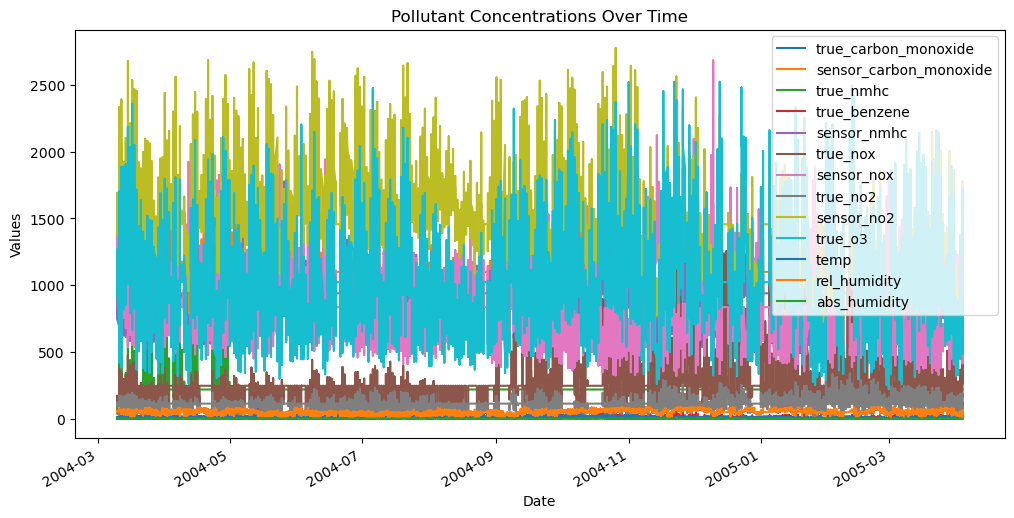

In [137]:
# Plot time series data
df.plot(figsize=(12, 6))
plt.title("Pollutant Concentrations Over Time")
plt.xlabel("Date")
plt.ylabel("Values")
plt.show()

We see that a lot of pollutant levels, `PT08.S4(NO2)` and `PT08.S5(O3)` to name two examples, decrease significantly around September of 2004. Most pollutants also reach relatively high levels in winter 2004-2005. 

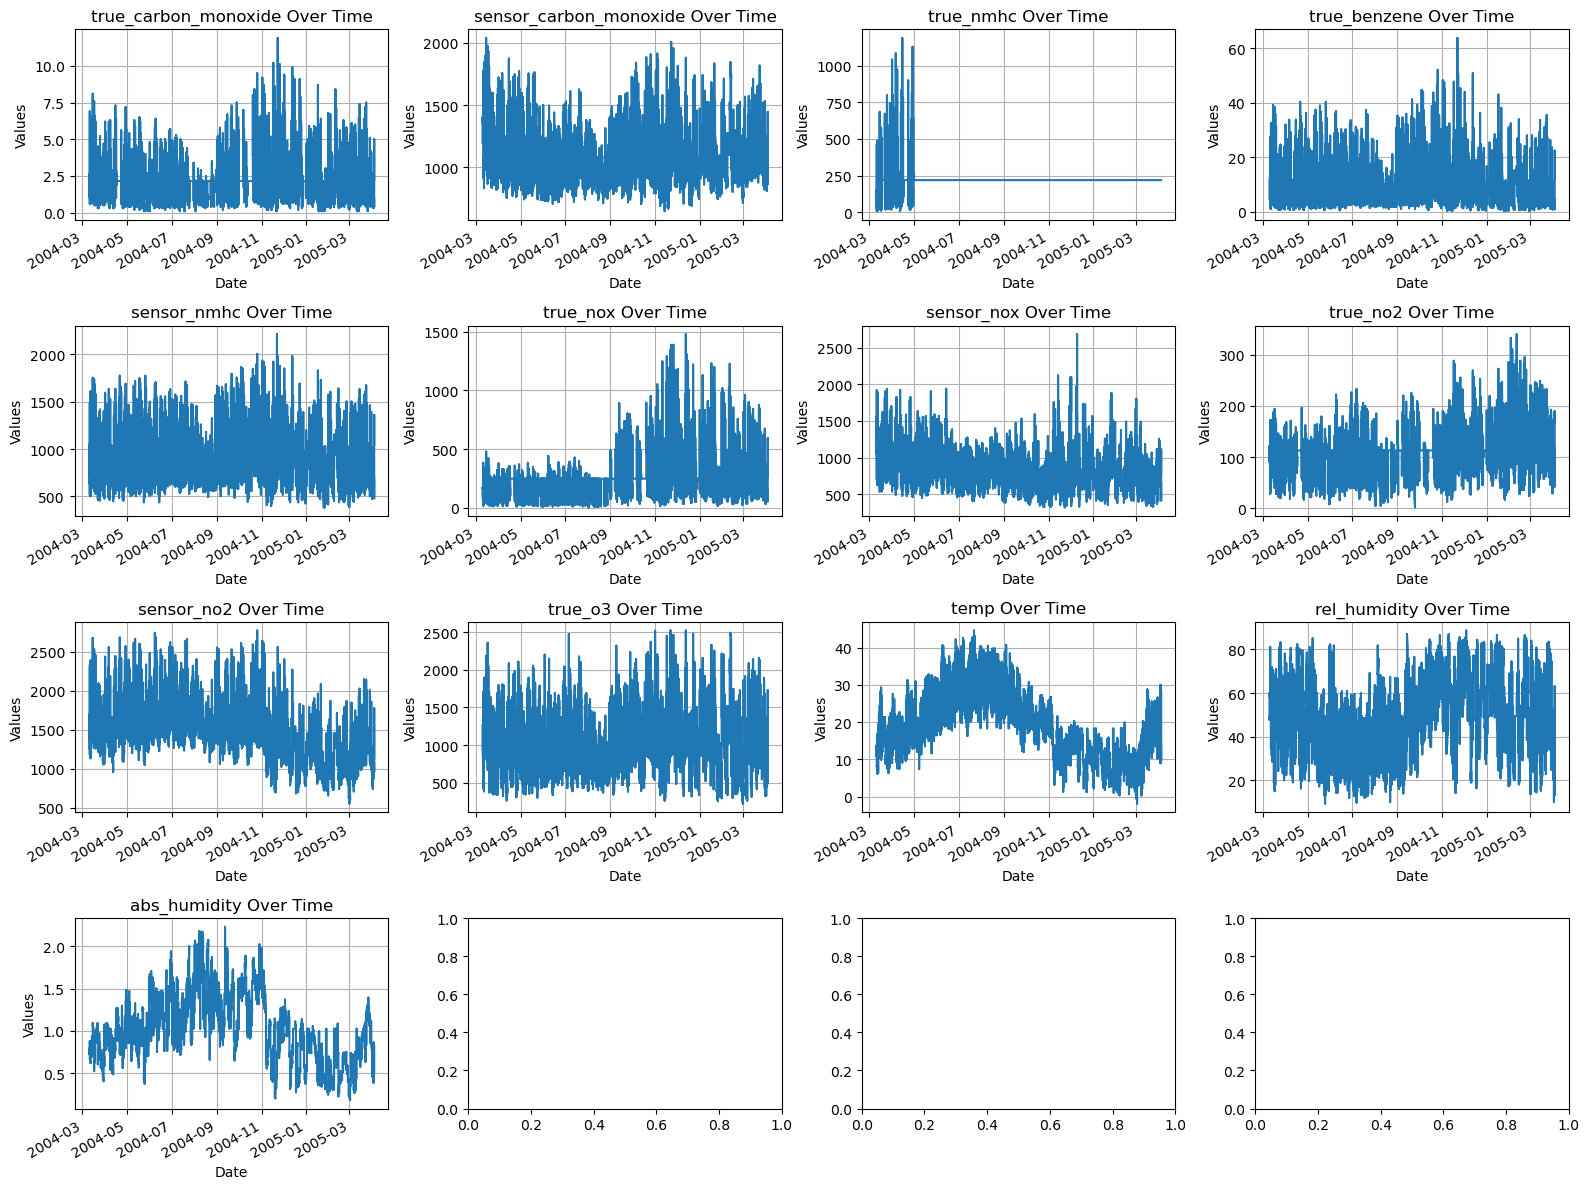

In [138]:
# Set up figure and axes
fig, axes = plt.subplots(4, 4, figsize=(16, 12))
axes = axes.flatten()

# Drop non-numeric column "time"
df = df.drop(columns={"time"})

# Plot each feature over time
for i, (col, ax) in enumerate(zip(df.columns, axes)): 
    df[col].plot(ax=ax)
    ax.set_title(f"{col} Over Time")
    ax.set_xlabel("Date")
    ax.set_ylabel("Values")
    ax.grid(True)

# Show plots
plt.tight_layout()
plt.show()

We notice that most pollutants spike during winter 2004-2005. This could be for a number of reasons, including but not limited to: increased heating due to cold temperatures, holiday travel, or heightened industrial activity. Temperature patterns are what we would expect, with temperature oscillating between highs in summer and lows in winter. However, the humidity patterns are interesting, with relative humidity reaching its maximum at the beginning of 2005 while absolute humidity is highest in fall 2004. The two humidity graphs are almost mirrors of each other over the horizontal axis. 

# Task 8
Discuss the need for standardizing and/or normalizing your dataset based on Step 6 output.

The descriptive statistics we uncovered in task 5 suggest that different numeric variables are on wildly different scales. For example, `true_carbon_monoxide` has a max value of 11.9, while `sensor_carbon_monoxide` has a max value of 2039.75. These variables use different units, and thus should be normalized. 

# References
UCI Machine Learning Repository. (n.d.). https://archive.ics.uci.edu/dataset/360/air+quality <br>
Wanyama, R. (2023, October 26). Time Series Forecasting for Predicting Store Sales: A Comprehensive Guide. Medium. https://medium.com/@rasmowanyama/title-time-series-forecasting-for-store-sales-a-comprehensive-guide-33346108c2fe <br>
Kurumatani, K. (2020). Time series forecasting of agricultural product prices based on recurrent neural networks and its evaluation method. SN Applied Sciences, 2(8). https://doi.org/10.1007/s42452-020-03225-9